In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
census_train = pd.read_csv("C:/Users/eje913/ct16_cap1_ds6/project_2/data/ad_placement/census-income.csv", header=None)

In [3]:
census_train.columns= ['age', 'class_of_worker', 'industry_recode','occupation_recode', 'education', 'wage_per_hour', \
                      'enroll_in_ed', 'marital', 'industry_cd', 'occupation_cd', 'race', 'hispanic_origin', 'sex', \
                      'labor_union', 'reason_unemployed', 'employ_stat', 'capital_gains', 'capital_losses', 'dividends', \
                      'tax_filer', 'region_prev_resid', 'state_prev_resid', 'household_stat','household_summary', 'weight',\
                      'change_in_msa', 'change_in_reg', 'move_within_reg', 'live_here_before', 'prev_resid_sunbelt',\
                      'num_person_worked', 'under_18', 'birth_country_dad', 'birth_country_mom', 'birth_country_self', \
                      'citizenship', 'owner_self_employed', 'veterans_admin', 'veterans_benefits', 'weekes_worked_year', 'year', \
                       'target'] 


In [4]:
census_train

,age,class_of_worker,industry_recode,occupation_recode,education,wage_per_hour,enroll_in_ed,marital,industry_cd,occupation_cd,...,birth_country_dad,birth_country_mom,birth_country_self,citizenship,owner_self_employed,veterans_admin,veterans_benefits,weekes_worked_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [5]:
# make target 0/1
census_train['target_bin']=census_train['target'].apply(lambda x: 1 if x.strip()=='50000+.' else 0 if x.strip()=='- 50000.' else 'miss')
#print census_train.groupby(['target_bin']).count()

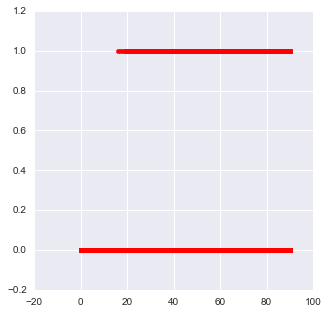

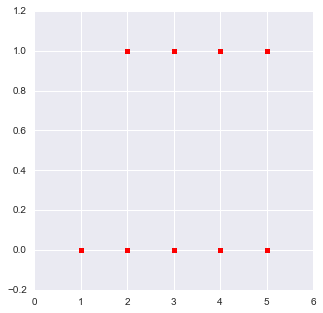

In [6]:
# look at age vs binary target
fig = plt.figure(figsize=(5,5))
# Create the axes for our single plot
ax = fig.add_subplot(1,1,1)
# Generate a scatter plot of the x and y values of our data in red
ax.scatter(census_train['age'], census_train['target_bin'], color='r')

# lets bucket ages 

# 0-15 (child-1), 16-22 (school-2), 23-39 (entry-3), 40-66 (manage-4), 67+ (retire-5)
census_train['age_bucket']=census_train['age'].apply(lambda x: 1 if 0<=x<=15 else 2 if 16<=x<=22 else 3 if 23<=x<=39 else 4 if 40<=x<=66
                                             else 5 if x>=67 else 'miss')
census_train['age_bucket'].value_counts()

# look at age bucket vs binary target
fig = plt.figure(figsize=(5,5))
# Create the axes for our single plot
ax = fig.add_subplot(1,1,1)
# Generate a scatter plot of the x and y values of our data in red
ax.scatter(census_train['age_bucket'], census_train['target_bin'], color='r')

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class_of_worker, dtype: int64
                                              age  industry_recode  \
class_of_worker                 target_bin                           
 Federal government             0            2328             2328   
                                1             597              597   
 Local government               0            6937             6937   
                                1             847              847   
 Never worked                   0             437              437   
                                1               2                2   
 Not in universe          

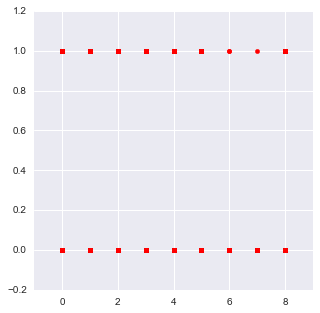

In [13]:
#class of worker
'''
All people over the age of 15 who have been employed at any 
time are asked to designate the type of work normally done or the work performed most regularly. 
'''

print census_train['class_of_worker'].value_counts()
print census_train.groupby(['class_of_worker','target_bin']).count()

# convert to numebrs
census_train['class_code']=census_train['class_of_worker'].apply(lambda x: 0 if x.strip()=='Not in universe' 
                                                                else 1 if x.strip()=='Private'
                                                                else 2 if x.strip()=='Self-employed-not incorporated'
                                                                else 3 if x.strip()=='Local government'
                                                                else 4 if x.strip()=='State government'
                                                                else 5 if x.strip()=='Federal government'
                                                                else 6 if x.strip()=='Never worked'
                                                                else 7 if x.strip()=='Without pay'
                                                                else 8 if x.strip()=='Self-employed-incorporated'
                                                                else 'miss')
census_train['class_code'].value_counts()
fig = plt.figure(figsize=(5,5))
# Create the axes for our single plot
ax = fig.add_subplot(1,1,1)
# Generate a scatter plot of the x and y values of our data in red
ax.scatter(census_train['class_code'], census_train['target_bin'], color='r')

In [14]:
# industry recode
census_train['industry_recode'].value_counts()

# lets bucket into the major industries to reduce the number of categories
census_train.groupby(['industry_recode','industry_cd']).count()

'''
0: not in universe
1: agriculture, fishing, forestry, hunting
2: mining
3: construction
4: manufacturing
5: wholesale and retail trade
6: transportation and utilities
7: information
8: financial activities
9: professional and business services
10: education and health services
11: leisure and hospitality
12: other services
13: public administration
14: armed forces
'''

industry_major={0:0,1:1,2:1,3:2,4:3,5:4,6:4,7:4,8:4,9:4,10:4,11:4,12:4,13:4,14:4,15:4,16:4,17:4,18:4,19:4,20:4,21:4,
               22:4,23:4,24:4,25:4,26:4,27:4,28:4,29:6,30:6,31:6,32:5,33:5,34:8,35:8,36:12,37:9,38:9,39:12,40:11,41:10,
               42:10,43:10,44:12,45:9,46:1,47:13,48:13,49:13,50:13,51:14}
census_train['industry_major_cd']=census_train['industry_recode'].apply(lambda x: industry_major.get(x))
census_train['industry_major_cd'].value_counts()


0     100684
5      20666
10     16930
4      15912
9      10133
6       6568
12      6431
8       6145
3       5984
13      4610
1       3210
11      1651
2        563
14        36
Name: industry_major_cd, dtype: int64

In [10]:
# occupation recode
census_train['occupation_recode'].value_counts()

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
44      1592
41      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: occupation_recode, dtype: int64

In [16]:
# education
census_train['education'].value_counts()

#lets group these a bit and convert to numbers
census_train['education_bucket']=census_train['education'].apply(lambda x: 2 if x.strip()=='Less than 1st grade'
                                                                else 2 if x.strip()=='1st 2nd 3rd or 4th grade'
                                                                else 3 if x.strip()=='5th or 6th grade'
                                                                else 1 if x.strip()=='Children'
                                                                else 3 if x.strip()=='7th and 8th grade'
                                                                else 4 if x.strip()=='9th grade'
                                                                else 4 if x.strip()=='10th grade'
                                                                else 4 if x.strip()=='11th grade'
                                                                else 4 if x.strip()=='12th grade no diploma'
                                                                else 5 if x.strip()=='High school graduate'
                                                                else 6 if x.strip()=='Some college but no degree'
                                                                else 6 if x.strip()=='Associates degree-occup / vocational'
                                                                else 6 if x.strip()=='Associates degree-academic program'
                                                                else 7 if x.strip()=='Bachelors degree(BA AB BS)'
                                                                else 8 if x.strip()=='Masters degree(MA MS MEng MEd MSW MBA)'
                                                                else 8 if x.strip()=='Prof school degreee (MD DDS DVM LLB JD)'
                                                                else 8 if x.strip()=='Doctorate degree(PhD EdD)'
                                                                else 'miss')

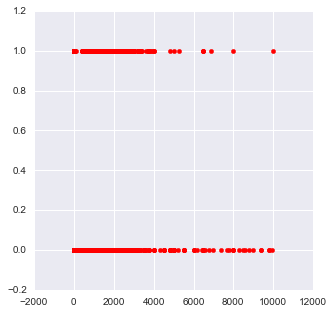

In [14]:
# wage per hour
census_train['wage_per_hour'].value_counts()

# Generate a single figure to hold our plot
fig = plt.figure(figsize=(5,5))
# Create the axes for our single plot
ax = fig.add_subplot(1,1,1)
# Generate a scatter plot of the x and y values of our data in red
ax.scatter(census_train['wage_per_hour'], census_train['target_bin'], color='r')
#ax.axis('equal') # equal scaling on both axis;

In [18]:
# enroll in ed
census_train['enroll_in_ed'].value_counts()

#this seems pretty useless to me since 94% have the same value so let's drop it!
census_train.drop(['enroll_in_ed'], axis=1, inplace=True)

In [19]:
# marital
census_train['marital'].value_counts()

#convert to number
census_train['marital_code']=census_train['marital'].apply(lambda x: 0 if x.strip()=='Never married' 
                                                                else 1 if x.strip()=='Married-civilian spouse present'
                                                                else 2 if x.strip()=='Divorced'
                                                                else 3 if x.strip()=='Widowed'
                                                                else 4 if x.strip()=='Separated'
                                                                else 5 if x.strip()=='Married-spouse absent'
                                                                else 6 if x.strip()=='Married-A F spouse present'
                                                                else 'miss')

### remaining vars:
age_bucket, class_code, target_bin, industry_major_cd, occupation_recode, wage_per_hour, marital_code, education_bucket

### lets look at differnt combinations

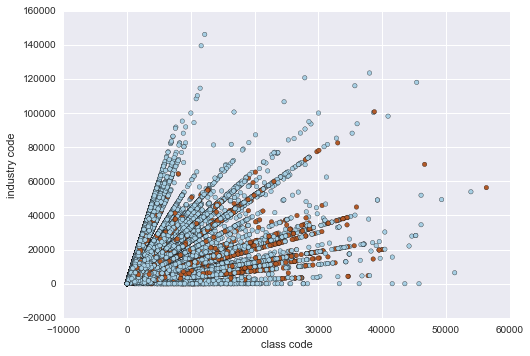

In [15]:
plt.scatter(census_train['class_code'], census_train['industry_major_cd'], c=census_train['target_bin'], cmap=plt.cm.Paired)
plt.xlabel('class code')
plt.ylabel('industry code')

i don't see any major splits

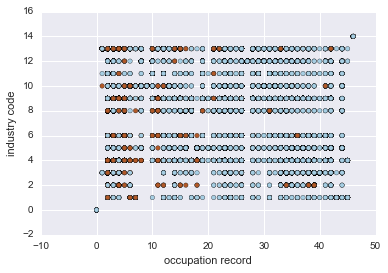

In [37]:
plt.scatter(census_train['occupation_recode'], census_train['industry_major_cd'], c=census_train['target_bin'], cmap=plt.cm.Paired)
plt.xlabel('occupation record')
plt.ylabel('industry code')

looks like occupation has a decent split ~20

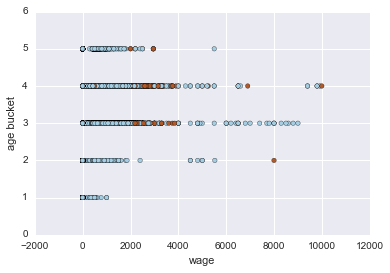

In [38]:
plt.scatter(census_train['wage_per_hour'], census_train['age_bucket'], c=census_train['target_bin'], cmap=plt.cm.Paired)
plt.xlabel('wage')
plt.ylabel('age bucket')

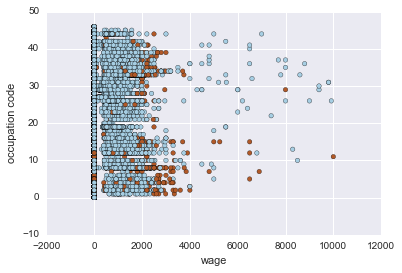

In [39]:
plt.scatter(census_train['wage_per_hour'], census_train['occupation_recode'], c=census_train['target_bin'], cmap=plt.cm.Paired)
plt.xlabel('wage')
plt.ylabel('occupation code')